# **Predicting the Likelihood of Employee Attrition Using Logistic Regression**

<br>Midterm Project
<br>BDM 1034 - Application Design for Big Data
<br><br>Group 6:
<br>&emsp;Bhumika Rajendra Babu - C0867081
<br>&emsp;Jovi Fez Bartolata - C0869701
<br>&emsp;Maricris Resma - C0872252
<br>&emsp;Pradeep Kumar Bhatt - C0875486
<br>&emsp;Sunny Prashant Dsouza - C0865183

![separator1](https://i.imgur.com/ZUWYTii.png)
# **Import Modules**

In [37]:
# Import modules
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.backends.backend_pdf import PdfPages
from math import sqrt
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from IPython.display import display
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

# Plot Style
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 10
sns.set_theme(style='darkgrid', palette='pastel', )
plt.rcParams['figure.facecolor'] = 'e7fff7' #https://www.colorhexa.com/ffe5b4
subplot_fontsize = 15
mainplot_fontsize = 20
scatterpoint_fontsize = 20

# Set the max columns to None to display all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

![separator1](https://i.imgur.com/ZUWYTii.png)
# **Exploratory Data Analysis**

In [38]:
# Import data
model_data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv',header=0)

In [39]:
# Change the Attrition values to 1 (Yes) and 0 (No)
print('Old Values:',model_data['Attrition'].unique())

# Change Yes/No values to 1/0
model_data['Attrition'] = np.where(model_data['Attrition']=='Yes',1,0)
print('New Values:',model_data['Attrition'].unique())

model_data.head()

Old Values: ['Yes' 'No']
New Values: [1 0]


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### **Dataset Quality Checking**

##### Get the Shape

In [40]:
model_data.shape

(1470, 35)

- The shape result shows we have 1470 rows and 35 columns

##### Have an overview of the mean, min, max, std

In [41]:
model_data.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


- From this table we are able to see right away the std, mean, max, min for a non-graphical view of the distribution of the data and obvious outliers if any 

In [42]:
# Check info to have an idea if future data cleaning is needed
# To get a view if there are numerical and categorical data
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int32 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

##### Count Unique Values 
- Check frequency counts for each column to get an idea of the range of data for each 
- Add the variables whose unique data count is only 1 to list of colums to drop

In [43]:
drop_variables = [] # Create a list of variables to be dropped
num_unique_col = [] # Create a list of number of unique values for each variable

for eachCol in model_data:
    num_unique = len(model_data[eachCol].unique())
    if (num_unique == 1) or (eachCol in ['EmployeeNumber']):
        drop_variables.append(eachCol)
    else:
        num_unique_col.append(num_unique)

# Variables to be dropped from the model data
drop_variables

['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']

##### Drop Columns

In [44]:
# Drop variables that are not useful in the modeling (i.e. IDs, those with only 1 possible value)
model_data.drop(columns=(drop_variables + ['EmployeeNumber']), inplace=True)
model_data.shape

(1470, 31)

- The shape result shows we have 1470 rows and 32 columns after the initial removal of variables.

In [45]:
# Create a df so we can see a summary of quality of data as we progress
data_quality = pd.DataFrame()
data_quality['varname'] = []
data_quality['dtype'] = model_data.dtypes
data_quality['varname'] = data_quality.index

# Add the number of unique data
data_quality['num_unique'] = num_unique_col
data_quality

,varname,dtype,num_unique
Age,Age,int64,43
Attrition,Attrition,int32,2
BusinessTravel,BusinessTravel,object,3
DailyRate,DailyRate,int64,886
Department,Department,object,3
DistanceFromHome,DistanceFromHome,int64,29
Education,Education,int64,5
EducationField,EducationField,object,6
EnvironmentSatisfaction,EnvironmentSatisfaction,int64,4
Gender,Gender,object,2


##### Get list of categorical, numerical variables


- We treat interval and ratio variables as numerical, otherwise categorical
- Numerical values can be divided to continuous and discrete data
- If there are only a few levels of fixed value for a discrete variable, we can decide whether it's best to treat it as a categorical variable

https://support.minitab.com/en-us/minitab/20/help-and-how-to/statistical-modeling/regression/supporting-topics/basics/what-are-categorical-discrete-and-continuous-variables/
 <!-- Treating a predictor as a continuous variable implies that a simple linear or 
 polynomial function can adequately describe the relationship between the response 
 and the predictor. 
 
 When you treat a predictor as a categorical variable, 
 a distinct response value is fit to each level of the variable 
 without regard to the order of the predictor levels. -->

In [46]:
# Categorical variables
categorical_vars = ['BusinessTravel', 'Department', 'Education', 'EducationField','Gender', 'JobRole',
                    'MaritalStatus', 'OverTime']

# Numerical variables (all other variables that are not categorical)
numerical_vars = [i for i in model_data.columns if i not in categorical_vars + ['Attrition']]

print(f'{len(categorical_vars)} categorical_vars: \n{categorical_vars}\n')
print(f'{len(numerical_vars)} numerical_vars: \n{numerical_vars}')

8 categorical_vars: 
['BusinessTravel', 'Department', 'Education', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

22 numerical_vars: 
['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


##### Check for NULL and NaN values

In [47]:
# Add counts of null values to the data quality summary 
data_quality['data_type'] = np.where(data_quality['varname'].isin(numerical_vars), 'numerical', 'categorical')

data_quality['Null count'] = model_data.isnull().sum()
data_quality['NaN count'] = model_data.isna().sum()
if data_quality['Null count'].any(axis=None) or data_quality['NaN count'].any(axis=None) :
        print('There is a Null and/or NaN value')
data_quality

,varname,dtype,num_unique,data_type,Null count,NaN count
Age,Age,int64,43,numerical,0,0
Attrition,Attrition,int32,2,categorical,0,0
BusinessTravel,BusinessTravel,object,3,categorical,0,0
DailyRate,DailyRate,int64,886,numerical,0,0
Department,Department,object,3,categorical,0,0
DistanceFromHome,DistanceFromHome,int64,29,numerical,0,0
Education,Education,int64,5,categorical,0,0
EducationField,EducationField,object,6,categorical,0,0
EnvironmentSatisfaction,EnvironmentSatisfaction,int64,4,numerical,0,0
Gender,Gender,object,2,categorical,0,0


#### Check for duplicates
 <!-- observations should not come from repeated measurements or matched data. -->

In [48]:
model_data.duplicated().sum()

0

**Insights:** Quality of dataset is good and no further cleaning is necessary
- no null values
- no NaN values
- no duplicates


##### GroupBy Queries (non-graphical EDA)

In [49]:
# Get % of attrition of data per category
for eachVar in categorical_vars:
    model_data_groupby_category = model_data[[eachVar, 'Attrition']]
    model_data_groupby_category =  pd.DataFrame(model_data_groupby_category.groupby([eachVar, 'Attrition']).value_counts())
    model_data_groupby_category.reset_index(inplace=True)
    model_data_groupby_category.rename(columns={0:'count'}, inplace=True)
    model_data_groupby_category['%'] = 100 * model_data_groupby_category['count'] / model_data_groupby_category.groupby(eachVar)['count'].transform('sum')
    display(model_data_groupby_category)


,BusinessTravel,Attrition,count,%
0,Non-Travel,0,138,92.000000
1,Non-Travel,1,12,8.000000
2,Travel_Frequently,0,208,75.090253
3,Travel_Frequently,1,69,24.909747
4,Travel_Rarely,0,887,85.043145
5,Travel_Rarely,1,156,14.956855


,Department,Attrition,count,%
0,Human Resources,0,51,80.952381
1,Human Resources,1,12,19.047619
2,Research & Development,0,828,86.160250
3,Research & Development,1,133,13.839750
4,Sales,0,354,79.372197
5,Sales,1,92,20.627803


,Education,Attrition,count,%
0,1,0,139,81.764706
1,1,1,31,18.235294
2,2,0,238,84.397163
3,2,1,44,15.602837
4,3,0,473,82.692308
5,3,1,99,17.307692
6,4,0,340,85.427136
7,4,1,58,14.572864
8,5,0,43,89.583333
9,5,1,5,10.416667


,EducationField,Attrition,count,%
0,Human Resources,0,20,74.074074
1,Human Resources,1,7,25.925926
2,Life Sciences,0,517,85.313531
3,Life Sciences,1,89,14.686469
4,Marketing,0,124,77.987421
5,Marketing,1,35,22.012579
6,Medical,0,401,86.422414
7,Medical,1,63,13.577586
8,Other,0,71,86.585366
9,Other,1,11,13.414634


,Gender,Attrition,count,%
0,Female,0,501,85.204082
1,Female,1,87,14.795918
2,Male,0,732,82.993197
3,Male,1,150,17.006803


,JobRole,Attrition,count,%
0,Healthcare Representative,0,122,93.129771
1,Healthcare Representative,1,9,6.870229
2,Human Resources,0,40,76.923077
3,Human Resources,1,12,23.076923
4,Laboratory Technician,0,197,76.061776
5,Laboratory Technician,1,62,23.938224
6,Manager,0,97,95.098039
7,Manager,1,5,4.901961
8,Manufacturing Director,0,135,93.103448
9,Manufacturing Director,1,10,6.896552


,MaritalStatus,Attrition,count,%
0,Divorced,0,294,89.908257
1,Divorced,1,33,10.091743
2,Married,0,589,87.518574
3,Married,1,84,12.481426
4,Single,0,350,74.468085
5,Single,1,120,25.531915


,OverTime,Attrition,count,%
0,No,0,944,89.563567
1,No,1,110,10.436433
2,Yes,0,289,69.471154
3,Yes,1,127,30.528846


##### Distribution of Class
Check if there is an imbalanced class.

In [50]:
# Distribution of classes
print('\nCount:')
print(model_data['Attrition'].value_counts())

print('\nDistribution:')
print(model_data['Attrition'].value_counts() / model_data.shape[0])


Count:
0    1233
1     237
Name: Attrition, dtype: int64

Distribution:
0    0.838776
1    0.161224
Name: Attrition, dtype: float64


**Observation:**
We have an imbalanced class. The minority class (Attrition=Yes=1) is only 16% of the observations.

In [51]:
# Class distribution

attrition = model_data['Attrition'].value_counts()
attrition.index = ['Attrition_No', 'Attrition_Yes']

fig = px.pie(attrition, values=attrition.values, names=attrition.index, 
             color_discrete_sequence=px.colors.sequential.Purp)

fig.update_traces(textposition='inside', textinfo='label+percent', rotation=112)
fig.update_layout(showlegend=False, title_text='Distribution of Classes: Attrition', title_x=0.5)
fig.show()

In [52]:
attrition = model_data['Attrition'].value_counts()
attrition.index = ['Attrition_No', 'Attrition_Yes']

fig = px.pie(attrition, values=attrition.values, names=attrition.index, 
             color_discrete_sequence=px.colors.sequential.Purp)

fig.update_traces(textposition='inside', textinfo='label+percent', rotation=112)
fig.update_layout(showlegend=False, title_text='Distribution of Target Label: Attrition', title_x=0.5)
fig.show()

##### Boxplot for Numerical Variables

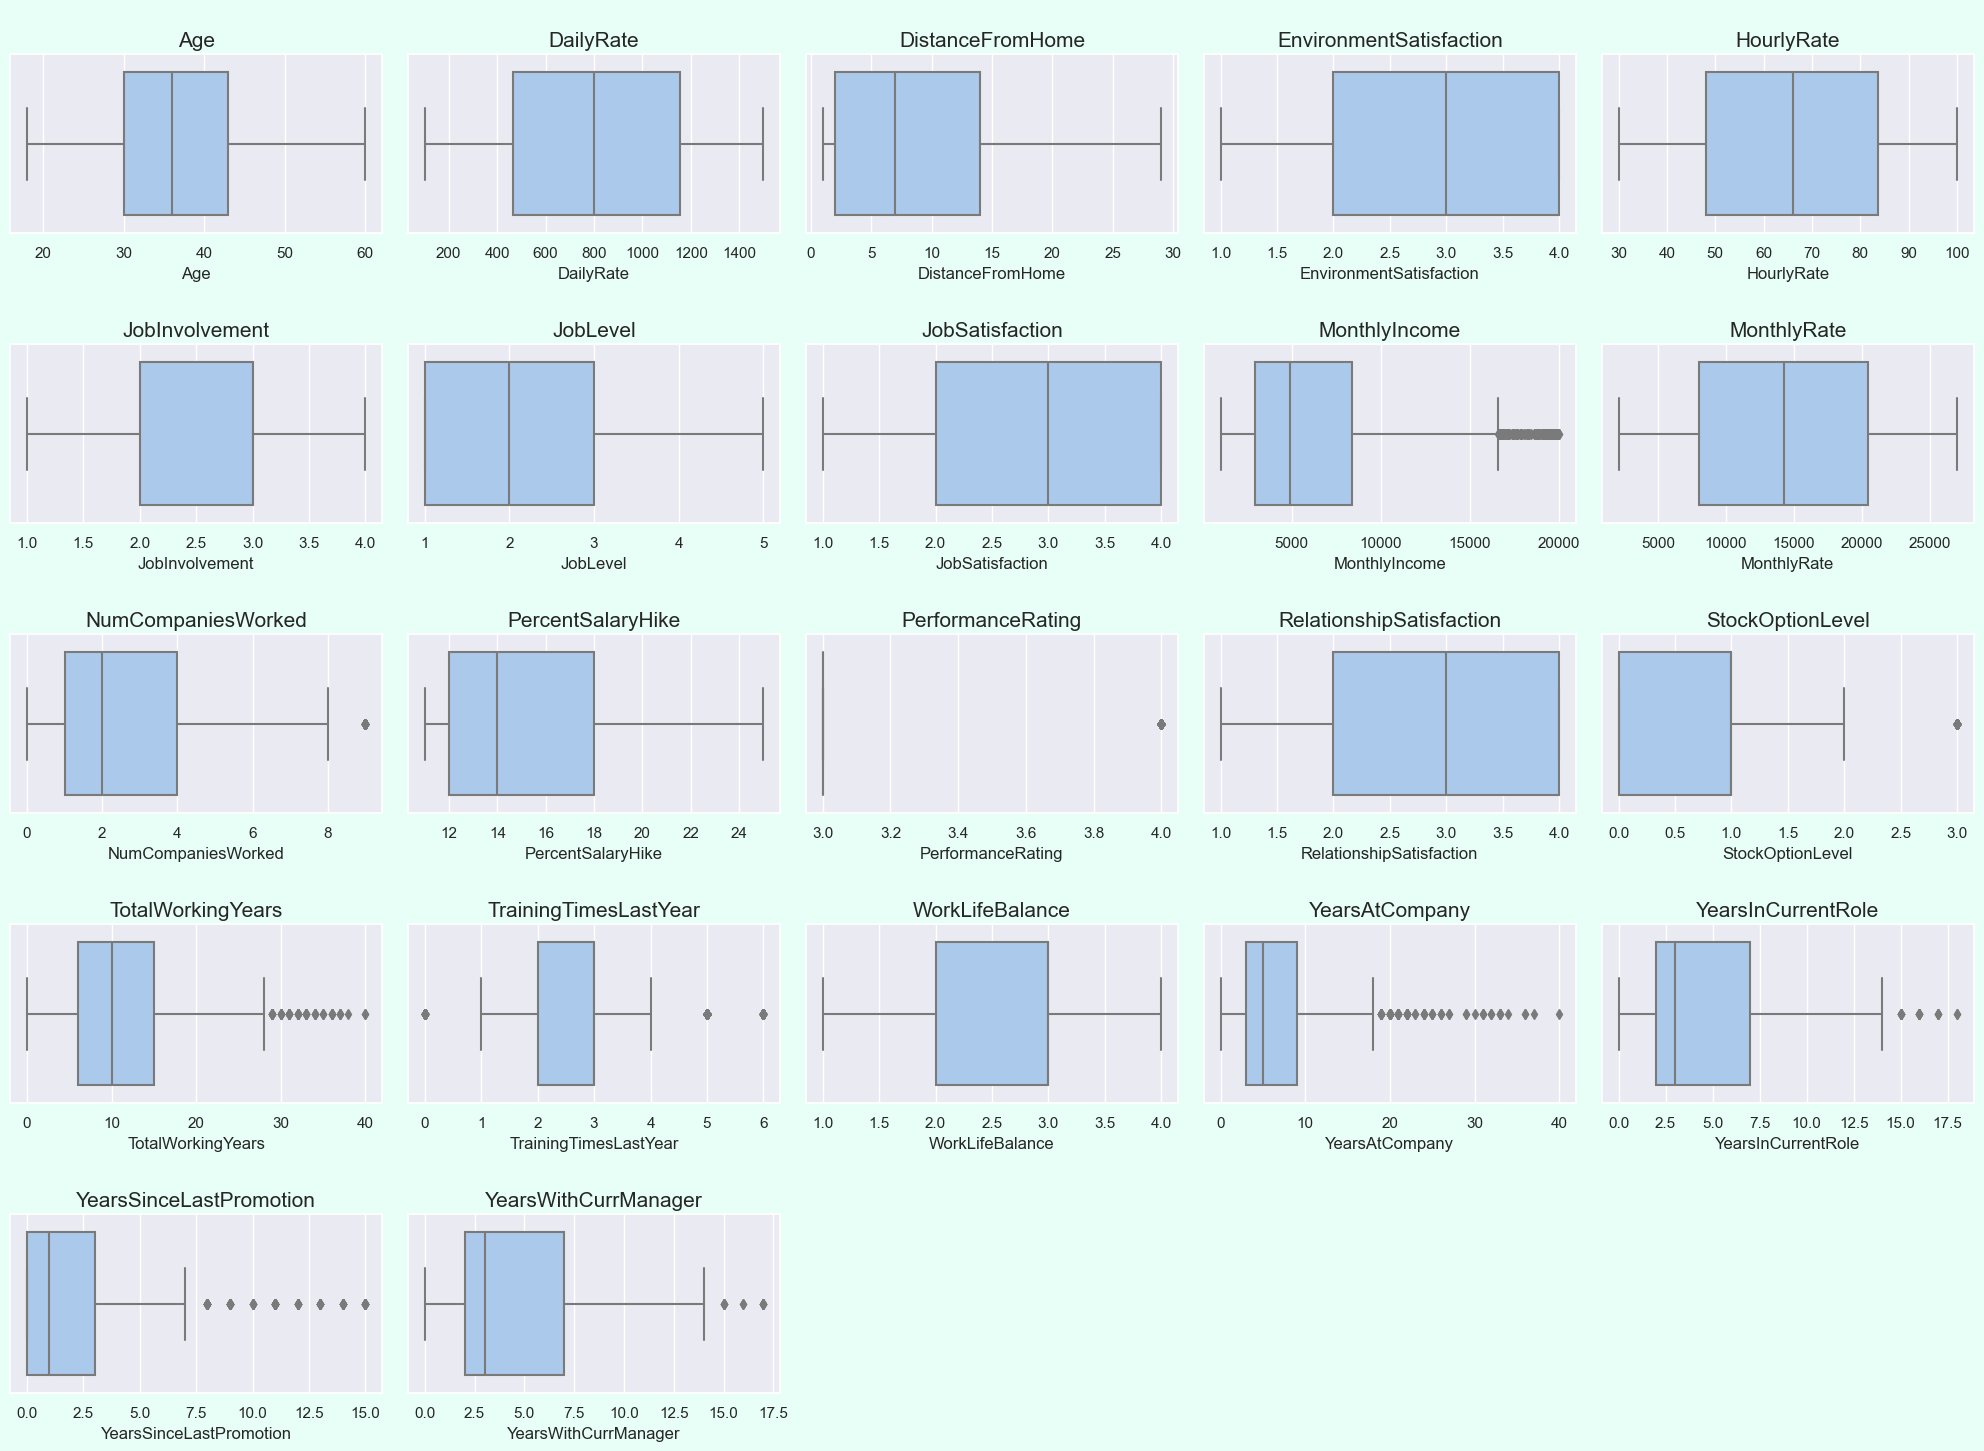

In [53]:
# Show the boxplot of each variable
plt.figure(figsize = (20, 20))
plotnumber = 1

for eachCol in numerical_vars:
    x = model_data[eachCol]
    ax = plt.subplot(7, 5, plotnumber)
    sns.boxplot(x = x)
    plt.title(f"\n{model_data[eachCol].name}", fontsize = subplot_fontsize)
    plotnumber += 1
plt.tight_layout()
plt.show()

- Here we are able to visually identify variables with outliers and standardized them in the next step

##### Standardize the Values of Numerical Variables

In [54]:
# Save a copy of data stats for scoring purposes
data_stats = model_data.describe()

# Output dataframe as csv file
# data_stats.to_csv('logistic regression - employee attrition.csv')

# List of standardized variables
standardized_vars = []
standardized_newvars = []

def StandardizeData(data,var,new_var):
    data[new_var] = ( data[var] - data[var].mean() ) / data[var].std()
    standardized_vars.append(var)
    standardized_newvars.append(new_var)

# Standardize numerical variables with outliers or wide range of values
StandardizeData(model_data, 'DailyRate', 'Std_DailyRate')
StandardizeData(model_data, 'HourlyRate', 'Std_HourlyRate')
StandardizeData(model_data, 'MonthlyIncome', 'Std_MonthlyIncome')
StandardizeData(model_data, 'MonthlyRate', 'Std_MonthlyRate')
StandardizeData(model_data, 'NumCompaniesWorked', 'Std_NumCompaniesWorked')
StandardizeData(model_data, 'TotalWorkingYears', 'Std_TotalWorkingYears')
StandardizeData(model_data, 'TrainingTimesLastYear', 'Std_TrainingTimesLastYear')
StandardizeData(model_data, 'YearsAtCompany', 'Std_YearsAtCompany')
StandardizeData(model_data, 'YearsInCurrentRole', 'Std_YearsInCurrentRole')
StandardizeData(model_data, 'YearsSinceLastPromotion', 'Std_YearsSinceLastPromotion')
StandardizeData(model_data, 'YearsWithCurrManager', 'Std_YearsWithCurrManager')

print('Standardized Variables:\n',standardized_vars)
print('\nStandardized Variables (New Column Names):\n',standardized_newvars)

model_data.head()


Standardized Variables:
 ['DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Standardized Variables (New Column Names):
 ['Std_DailyRate', 'Std_HourlyRate', 'Std_MonthlyIncome', 'Std_MonthlyRate', 'Std_NumCompaniesWorked', 'Std_TotalWorkingYears', 'Std_TrainingTimesLastYear', 'Std_YearsAtCompany', 'Std_YearsInCurrentRole', 'Std_YearsSinceLastPromotion', 'Std_YearsWithCurrManager']


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Std_DailyRate,Std_HourlyRate,Std_MonthlyIncome,Std_MonthlyRate,Std_NumCompaniesWorked,Std_TotalWorkingYears,Std_TrainingTimesLastYear,Std_YearsAtCompany,Std_YearsInCurrentRole,Std_YearsSinceLastPromotion,Std_YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0.742274,1.382668,-0.108313,0.725773,2.124413,-0.421499,-2.171243,-0.164557,-0.063274,-0.678915,0.245750
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,-1.297333,-0.240595,-0.291619,1.488370,-0.677819,-0.164455,0.155654,0.488342,0.764737,-0.368590,0.806267
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,1.413882,1.284288,-0.937335,-1.674271,1.323775,-0.550021,0.155654,-1.143905,-1.167290,-0.678915,-1.155541
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,1.460969,-0.486544,-0.763374,1.242788,-0.677819,-0.421499,0.155654,0.161892,0.764737,0.252060,-1.155541
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,-0.524116,-1.273580,-0.644639,0.325789,2.524732,-0.678543,0.155654,-0.817456,-0.615282,-0.058265,-0.595025


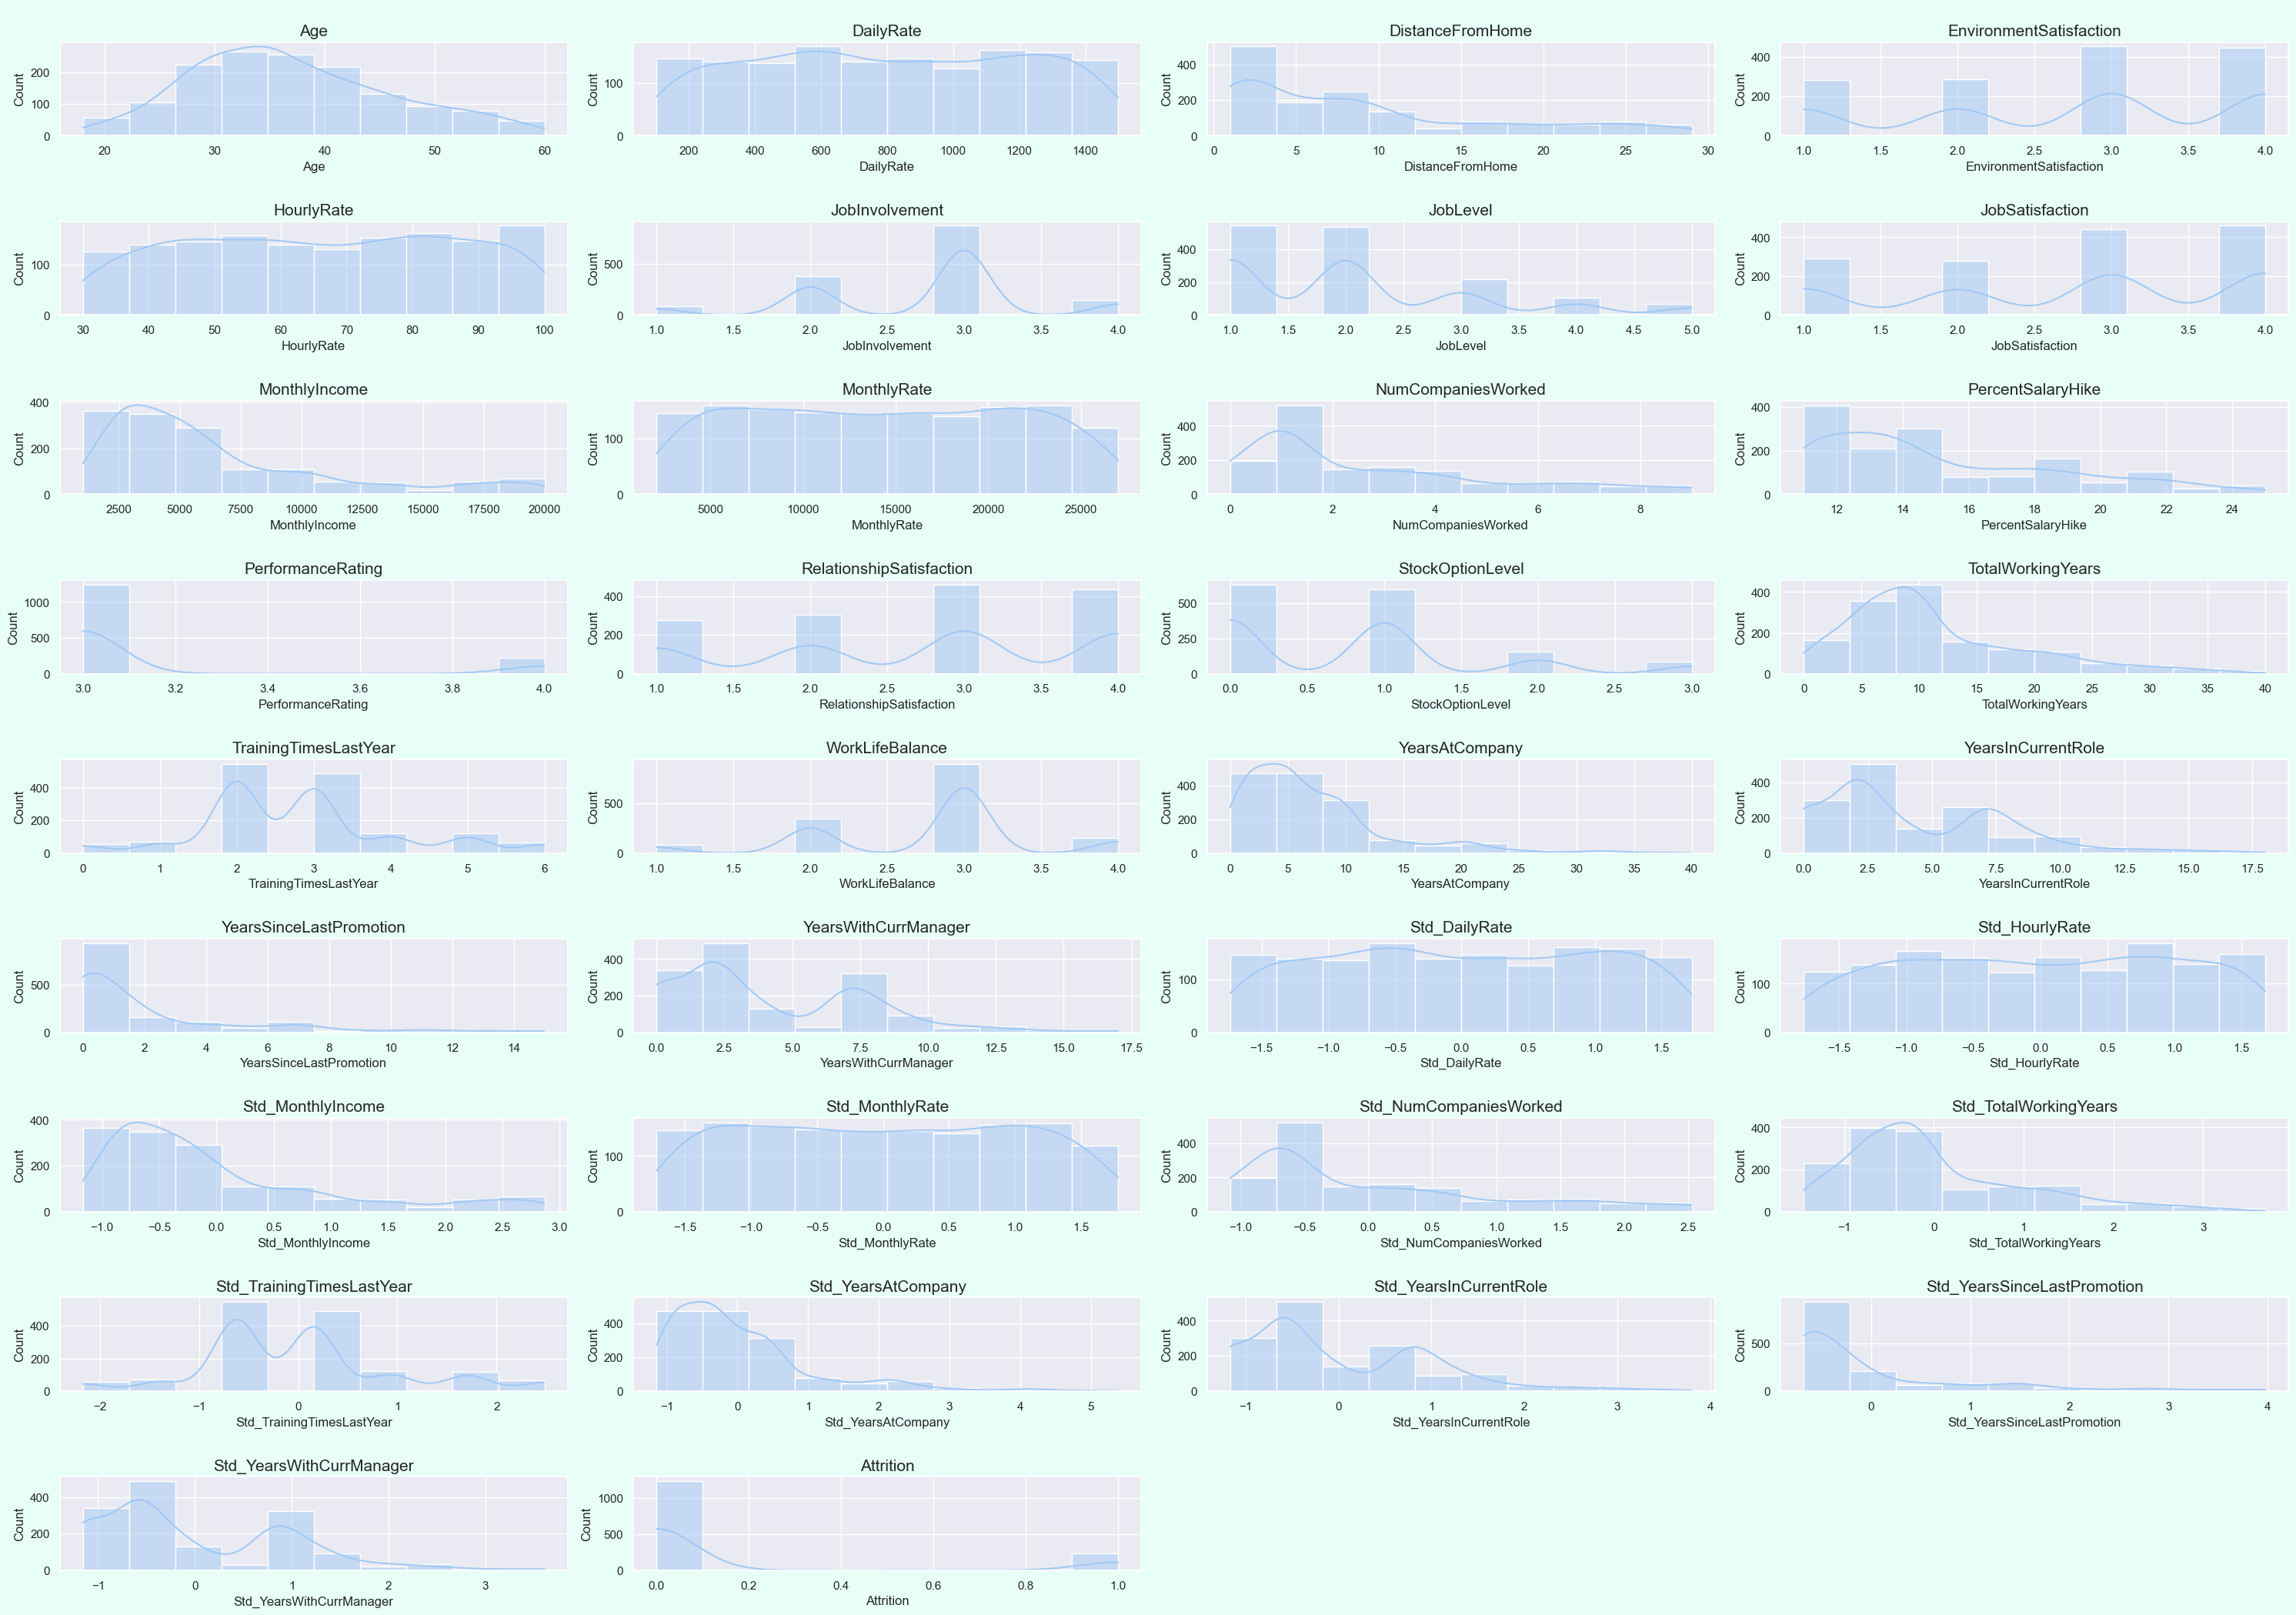

In [55]:
# Plot the histogram of numerical variables
plt.figure(figsize = (30, 30))
plotnumber = 1

for eachCol in (numerical_vars + standardized_newvars + ['Attrition']):
    x = model_data[eachCol]
    ax = plt.subplot(13, 4, plotnumber)
    sns.histplot(x = x, data = model_data['Attrition'], ax = ax, bins = 10, kde=True)
    plt.title(f"\n{model_data[eachCol].name}", fontsize = subplot_fontsize)
    plotnumber += 1
plt.tight_layout()
plt.show()

##### Stacked Bar Charts for Categorical Variables

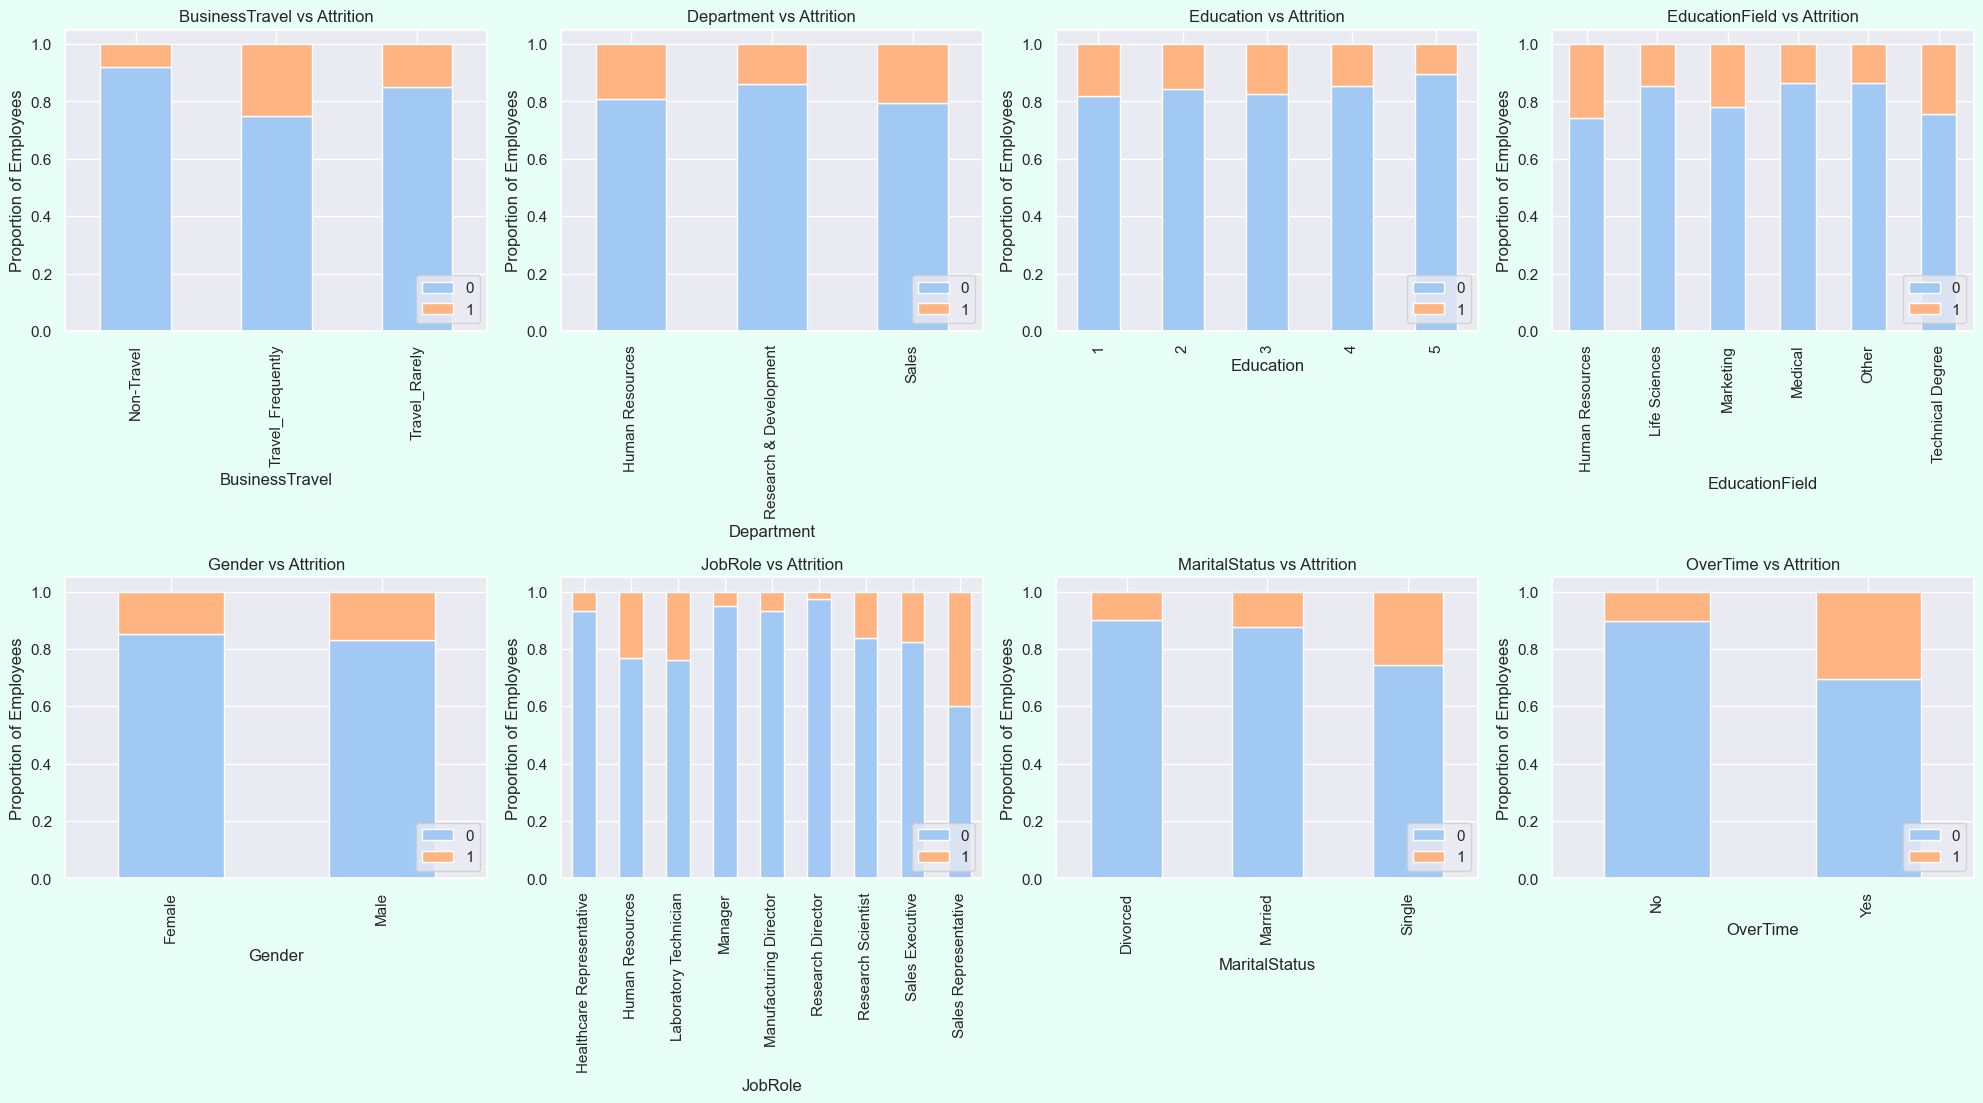

In [56]:
# Plot the stacked bar chart for each variable
plt.figure(figsize = (20, 20))
plotnumber = 1

for eachCol in categorical_vars:
    x = model_data[eachCol]
    ax = plt.subplot(4,4,plotnumber)   
    table=pd.crosstab(model_data[eachCol],model_data['Attrition'])
    table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',ax=ax, stacked=True).legend(loc='lower right')
    plt.title(f'{eachCol} vs Attrition')
    plt.ylabel('Proportion of Employees')
    plotnumber += 1

plt.tight_layout()
plt.show()

#### Create Dummy Variables for Categorical Data

In [57]:
# List of dummy variables
dummy_vars = []

# Create dummy variables for categorical data
def CreateDummyVariables(in_data,old_var,new_var,list_val):
    in_data[new_var] = np.where(model_data[old_var].isin(list_val), 1, 0)
    dummy_vars.append(old_var)

CreateDummyVariables(model_data,'BusinessTravel','BusinessTravel_Travel_Frequently',['Travel_Frequently'])
CreateDummyVariables(model_data,'Department','Department_Research_And_Development',['Research & Development'])
# CreateDummyVariables(model_data,'Education','_',[''])
CreateDummyVariables(model_data,'EducationField','EducationField_HR_Marketing_TechDeg',
                     ['Human Resources','Marketing','Technical Degree'])
CreateDummyVariables(model_data,'Gender','Gender_Male',['Male'])
CreateDummyVariables(model_data,'JobRole','JobRole_SalesRep_LabTech_HR_SalesExec',
                     ['Sales Representative', 'Laboratory Technician', 'Human Resources','Sales Executive'])
CreateDummyVariables(model_data,'JobRole','JobRole_SalesRep',['Sales Representative'])
CreateDummyVariables(model_data,'MaritalStatus','MaritalStatus_Single',['Single'])
CreateDummyVariables(model_data,'OverTime','OverTime_Yes',['Yes'])

print('Variables converted to dummies:\n',dummy_vars)

model_data.head()


Variables converted to dummies:
 ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'JobRole', 'MaritalStatus', 'OverTime']


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Std_DailyRate,Std_HourlyRate,Std_MonthlyIncome,Std_MonthlyRate,Std_NumCompaniesWorked,Std_TotalWorkingYears,Std_TrainingTimesLastYear,Std_YearsAtCompany,Std_YearsInCurrentRole,Std_YearsSinceLastPromotion,Std_YearsWithCurrManager,BusinessTravel_Travel_Frequently,Department_Research_And_Development,EducationField_HR_Marketing_TechDeg,Gender_Male,JobRole_SalesRep_LabTech_HR_SalesExec,JobRole_SalesRep,MaritalStatus_Single,OverTime_Yes
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0.742274,1.382668,-0.108313,0.725773,2.124413,-0.421499,-2.171243,-0.164557,-0.063274,-0.678915,0.245750,0,0,0,0,1,0,1,1
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,-1.297333,-0.240595,-0.291619,1.488370,-0.677819,-0.164455,0.155654,0.488342,0.764737,-0.368590,0.806267,1,1,0,1,0,0,0,0
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,1.413882,1.284288,-0.937335,-1.674271,1.323775,-0.550021,0.155654,-1.143905,-1.167290,-0.678915,-1.155541,0,1,0,1,1,0,1,1
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,1.460969,-0.486544,-0.763374,1.242788,-0.677819,-0.421499,0.155654,0.161892,0.764737,0.252060,-1.155541,1,1,0,0,0,0,0,1
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,-0.524116,-1.273580,-0.644639,0.325789,2.524732,-0.678543,0.155654,-0.817456,-0.615282,-0.058265,-0.595025,0,1,0,1,1,0,0,0


#### Final Data

In [58]:
# Remove columns with dummy variable counterparts
final_data = model_data.drop(columns=dummy_vars)

# Remove columns with standardized variable counterparts
final_data.drop(columns=standardized_vars, inplace=True)

final_data.head()

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance,Std_DailyRate,Std_HourlyRate,Std_MonthlyIncome,Std_MonthlyRate,Std_NumCompaniesWorked,Std_TotalWorkingYears,Std_TrainingTimesLastYear,Std_YearsAtCompany,Std_YearsInCurrentRole,Std_YearsSinceLastPromotion,Std_YearsWithCurrManager,BusinessTravel_Travel_Frequently,Department_Research_And_Development,EducationField_HR_Marketing_TechDeg,Gender_Male,JobRole_SalesRep_LabTech_HR_SalesExec,JobRole_SalesRep,MaritalStatus_Single,OverTime_Yes
0,41,1,1,2,2,3,2,4,11,3,1,0,1,0.742274,1.382668,-0.108313,0.725773,2.124413,-0.421499,-2.171243,-0.164557,-0.063274,-0.678915,0.245750,0,0,0,0,1,0,1,1
1,49,0,8,1,3,2,2,2,23,4,4,1,3,-1.297333,-0.240595,-0.291619,1.488370,-0.677819,-0.164455,0.155654,0.488342,0.764737,-0.368590,0.806267,1,1,0,1,0,0,0,0
2,37,1,2,2,4,2,1,3,15,3,2,0,3,1.413882,1.284288,-0.937335,-1.674271,1.323775,-0.550021,0.155654,-1.143905,-1.167290,-0.678915,-1.155541,0,1,0,1,1,0,1,1
3,33,0,3,4,4,3,1,3,11,3,3,0,3,1.460969,-0.486544,-0.763374,1.242788,-0.677819,-0.421499,0.155654,0.161892,0.764737,0.252060,-1.155541,1,1,0,0,0,0,0,1
4,27,0,2,1,1,3,1,2,12,3,4,1,3,-0.524116,-1.273580,-0.644639,0.325789,2.524732,-0.678543,0.155654,-0.817456,-0.615282,-0.058265,-0.595025,0,1,0,1,1,0,0,0


### **Initial Data Visualization**

#### Correlation Heat Map

<!-- # https://towardsdatascience.com/seaborn-pairplot-enhance-your-data-understanding-with-a-single-plot-bf2f44524b22#:~:text=The%20Seaborn%20Pairplot%20allows%20us,to%20become%20familiar%20with%20it.
sns.pairplot(model_data, diag_kind='kde',diag_kws={'color':'red'}, kind='reg',plot_kws={'line_kws':{'color':'black'},'color':'green'},hue='Research',)
plt.show() -->



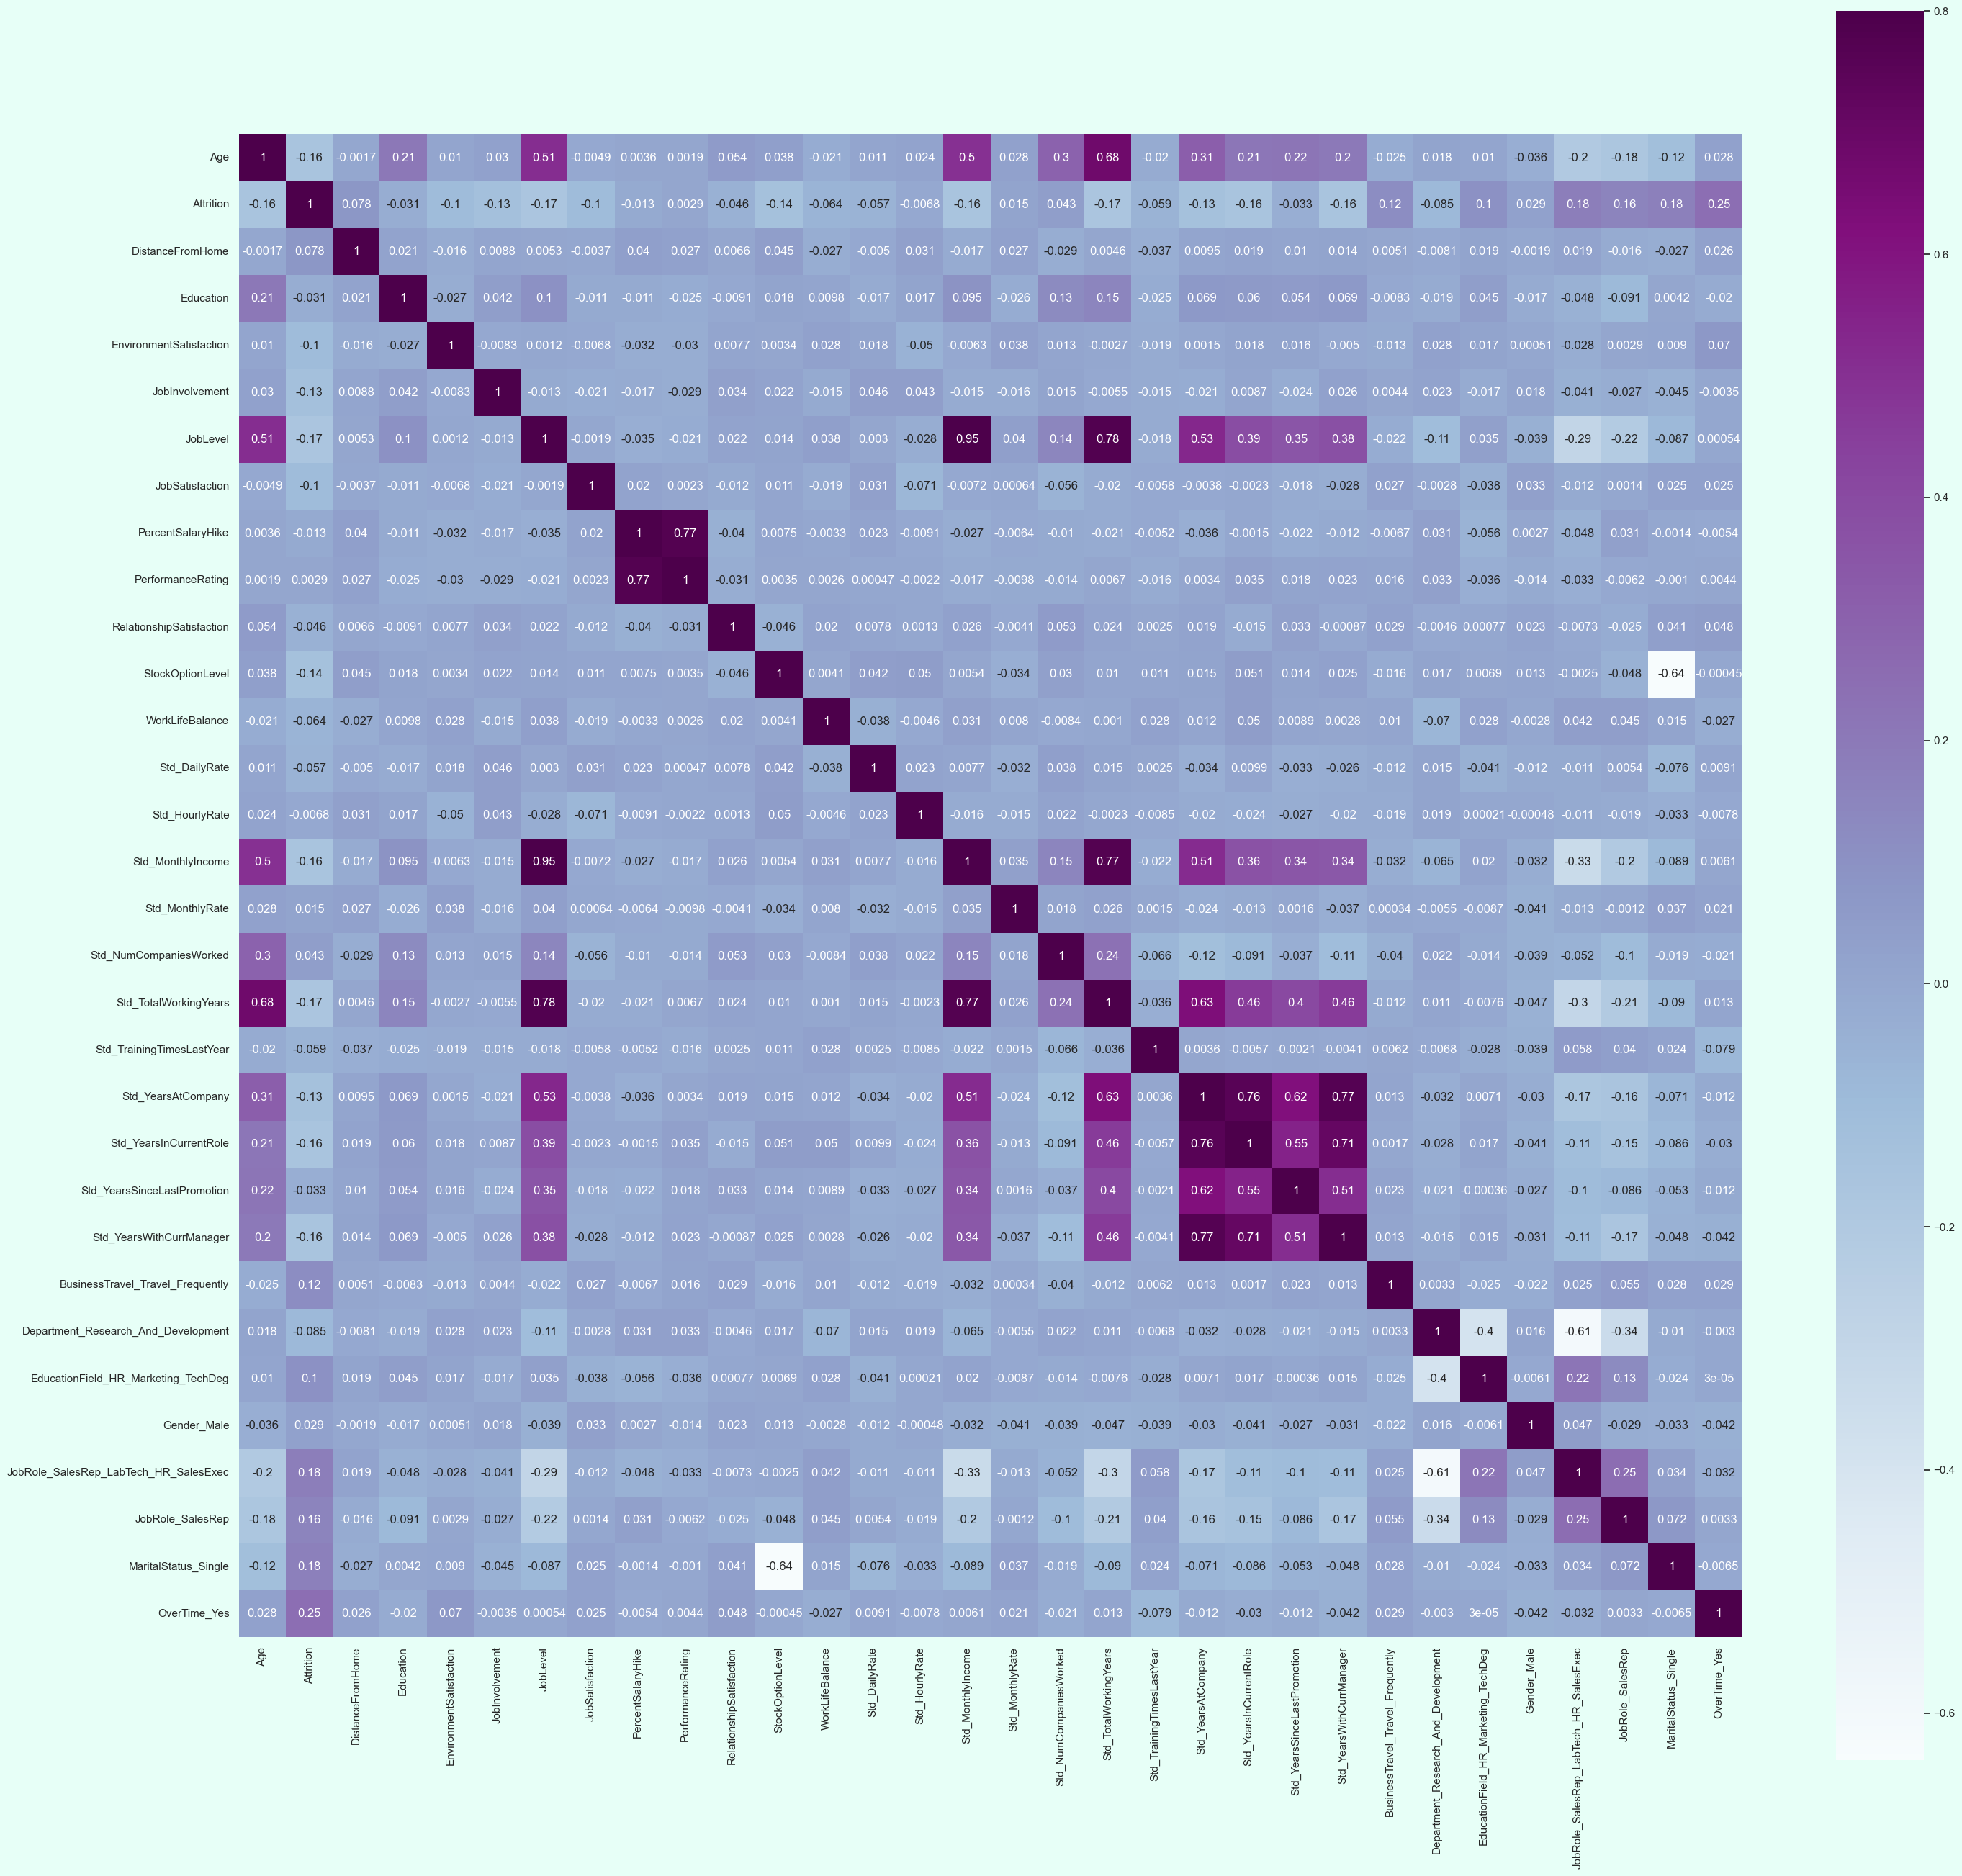

In [59]:
# Compute pairwise correlation of data and visualize
final_data_matrix = final_data.corr()
plt.figure(figsize = (30, 30))
sns.heatmap(final_data_matrix, vmax=.8, square=True, cmap="BuPu",annot=True);
plt.show()

- From above matrix we see some strong correlation between variables such as jobincome and monthly level which we will further verify during VIF checking in the model evaluation part

![separator1](https://i.imgur.com/ZUWYTii.png)

# **Data Modelling**

**Logistic Regression Requirements**

1. The dependent variable is binary
2. The observations should be independent of each other
3. Little or no multicollinearity among the independent variables



In [60]:
# Split dataset into y and x
y_values = final_data.loc[:, final_data.columns == 'Attrition']
x_values = final_data.loc[:, final_data.columns != 'Attrition']

print('Dependent Variable:')
print(y_values.columns)

print('\nIndependent Variables:',len(x_values.columns))
print(x_values.columns)

Dependent Variable:
Index(['Attrition'], dtype='object')

Independent Variables: 31
Index(['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'WorkLifeBalance', 'Std_DailyRate', 'Std_HourlyRate',
       'Std_MonthlyIncome', 'Std_MonthlyRate', 'Std_NumCompaniesWorked',
       'Std_TotalWorkingYears', 'Std_TrainingTimesLastYear',
       'Std_YearsAtCompany', 'Std_YearsInCurrentRole',
       'Std_YearsSinceLastPromotion', 'Std_YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently',
       'Department_Research_And_Development',
       'EducationField_HR_Marketing_TechDeg', 'Gender_Male',
       'JobRole_SalesRep_LabTech_HR_SalesExec', 'JobRole_SalesRep',
       'MaritalStatus_Single', 'OverTime_Yes'],
      dtype='object')


### Split to TRAIN and TEST Datasets

In [61]:
# Split the data into training (70%) and test (30%) datasets
x_train, x_test, y_train, y_test = train_test_split(x_values,y_values,test_size=0.3,random_state=42)

### Oversampling using SMOTE (Synthetic Minority Oversampling Technique) algorithm
- Since we have imbalanced classes, we will perform oversampling on the minority class. Note that this will be done on the training dataset only. The test dataset will remain.

In [62]:
oversample = SMOTE(random_state=1234)

x_oversample,y_oversample = oversample.fit_resample(x_train, y_train)

# Class distribution of the original training dataset / before performing SMOTE
print('\nBefore Oversampling:')
print('No. of Observations:',len(y_train))
print(y_train['Attrition'].value_counts() / len(y_train))

# Class distribution after performing SMOTE
print('\nAfter Oversampling:')
print('No. of Observations:',len(y_oversample))
print(y_oversample['Attrition'].value_counts() / len(y_oversample))


Before Oversampling:
No. of Observations: 1029
0    0.82896
1    0.17104
Name: Attrition, dtype: float64

After Oversampling:
No. of Observations: 1706
0    0.5
1    0.5
Name: Attrition, dtype: float64


**Observation:**
After performing SMOTE, the class distribution changed from 83-17 to 50-50.

### Recursive Feature Elimination
Perform RFE as initial feature elimination

In [63]:
# List of y and x variables
y_var = y_oversample.columns.values.tolist()
x_vars = x_oversample.columns.values.tolist()

# Using RFE, select/keep 20 features
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=20)
rfe = rfe.fit(x_oversample, y_oversample.values.ravel())

# Create a dataframe for the RFE result
rfe_summary = pd.DataFrame()
rfe_summary['varname'] = x_vars
rfe_summary['included'] = list(rfe.support_)
rfe_summary['rank'] = list(rfe.ranking_)

print(rfe_summary)

# Get the list of features based on RFE result
rfe_passed = rfe_summary['varname'][(rfe_summary['included'] == True )]

                                  varname  included  rank
0                                     Age     False    12
1                        DistanceFromHome     False     9
2                               Education     False     2
3                 EnvironmentSatisfaction      True     1
4                          JobInvolvement      True     1
5                                JobLevel      True     1
6                         JobSatisfaction      True     1
7                       PercentSalaryHike     False     8
8                       PerformanceRating      True     1
9                RelationshipSatisfaction      True     1
10                       StockOptionLevel      True     1
11                        WorkLifeBalance      True     1
12                          Std_DailyRate     False     5
13                         Std_HourlyRate     False     6
14                      Std_MonthlyIncome      True     1
15                        Std_MonthlyRate     False     4
16            

### Fit Logistic Regression Model

In [64]:
# For the initial run, fit the the model using all the variables from RFE i.e., use drop_x = [].
# Then manually remove insignificant variables based on model evaluation results.

# Manually dropped variables
drop_x = [
        # Failed p-value check
        'EducationField_HR_Marketing_TechDeg','JobRole_SalesRep_LabTech_HR_SalesExec',
        # Failed VIF check
        'JobLevel',
        # Incorrect relationship / coefficient sign
        'JobRole_SalesRep'
        ]

# Final datasets for modeling
x_train_final = x_oversample[rfe_passed.tolist()]   # Keep the columns based on RFE result
x_train_final.drop(columns=drop_x, inplace=True)    # Manually drop additional columns

y_train_final = y_oversample['Attrition']

# For statsmodels, add constant to the independent variables because it does not include the constant by default.
x_train_final_sm = sm.add_constant(x_train_final)

# Fit model using statsmodels
logit_model = sm.Logit(y_train_final,x_train_final_sm)
logit_model_result = logit_model.fit()
logit_model_summary = logit_model_result.summary()

# print(logit_model_summary)

Optimization terminated successfully.
         Current function value: 0.360937
         Iterations 7


### Initial Model Evaluation

**Check p-value**
- P < 0.05 Impactful 
- P >= 0.05 Not Impactful

**Check the sign of the coefficient**
- (+) Positive relationship with the target variable
- (-) Negative relationship with the target variable

**Test for Multicollinearity**
- Multicollinearity occurs when the independent variables are highly correlated to each other.

**Variance Inflation Factor (VIF) to test multicollinearity**
- VIF starts at 1 and has no upper limit
- VIF = 1, no correlation between the independent variable and the other variables
- VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others



In [65]:
# Convert model summary to dataframe
results_as_html = logit_model_summary.tables[1].as_html()
logit_result = pd.read_html(results_as_html, header=0, index_col=None)[0]

model_eval = pd.DataFrame()
model_eval["Predictors"] = x_train_final_sm.columns
model_eval["Coefficient"] = logit_result['coef']
model_eval['P-value'] = logit_result['P>|z|']
# model_eval

# Calculate VIFs. For each X, calculate VIF and save in dataframe
# Maintain only predictors (x's) with VIF < 10. No multicollinearity issues.
model_eval["VIF Factor"] = [variance_inflation_factor(x_train_final_sm.values, i) for i in range(x_train_final_sm.shape[1])]

# Tag evaluation result
model_eval['P-value Check'] = np.where(model_eval['P-value'] >= 0.05, 'Failed', '')
model_eval['VIF Check'] = np.where((model_eval['Predictors'] != 'const') & (model_eval['VIF Factor'] >= 10), 'Failed', '')

# Output the result/eval summary        
model_eval

,Predictors,Coefficient,P-value,VIF Factor,P-value Check,VIF Check
0,const,12.0464,0.000,128.242452,,
1,EnvironmentSatisfaction,-0.5686,0.000,1.048168,,
2,JobInvolvement,-0.9769,0.000,1.076588,,
3,JobSatisfaction,-0.5984,0.000,1.034394,,
4,PerformanceRating,-1.0255,0.000,1.029153,,
5,RelationshipSatisfaction,-0.3516,0.000,1.036880,,
6,StockOptionLevel,-0.9824,0.000,1.062721,,
7,WorkLifeBalance,-0.8688,0.000,1.041734,,
8,Std_MonthlyIncome,-0.6492,0.000,2.750497,,
9,Std_NumCompaniesWorked,0.6025,0.000,1.258356,,


**Interpretation:**
- Final table of evaluated model shows all p-value and VIF are within acceptable values 

### Baseline Model (Without Oversampling):
- Create a baseline model using the original train dataset with imbalanced classes
- Use this to check if there's an improvement in recall score

In [66]:
# BASELINE: Datasets for modeling
x_train_baseline = x_train[rfe_passed.tolist()]   # Get the variables based on RFE output
x_train_baseline.drop(columns=drop_x + ['PerformanceRating','Std_YearsWithCurrManager'], inplace=True)    # Manually drop additional variables.

# BASELINE: For statsmodels, add constant to independent variables because it does not include the constant by default.
x_train_baseline = sm.add_constant(x_train_baseline)

# BASELINE: Fit model using statsmodels
baseline_model = sm.Logit(y_train,x_train_baseline)
baseline_model_result = baseline_model.fit()
baseline_model_summary = baseline_model_result.summary()

# print(baseline_model_summary)

# Update the test dataset. Drop unnecessary columns. 
x_test_baseline = sm.add_constant(x_test)
x_test_baseline = x_test_baseline[x_train_baseline.columns.tolist()]

# The output values of baseline_model_result.predict(x_test_baseline) are probabilities between 0 and 1
# We need to round it off to identify the predicted class (>= 0.5 is 1; < 0.5 is 0)
y_pred_test_baseline = list(map(round, baseline_model_result.predict(x_test_baseline)))

# Performance
print('\n----- Baseline Performance -----')
print(f'Accuracy Score: {accuracy_score(y_test,y_pred_test_baseline)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_test_baseline)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred_test_baseline)}')
print(f'Recall score: {recall_score(y_test,y_pred_test_baseline)}')

Optimization terminated successfully.
         Current function value: 0.334101
         Iterations 7

----- Baseline Performance -----
Accuracy Score: 0.8752834467120182
Confusion Matrix: 
[[371   9]
 [ 46  15]]
Area Under Curve: 0.6111087144089733
Recall score: 0.2459016393442623


**Interpretation:**
- The recall score of the baseline model with imbalanced classes is 0.2459

![separator1](https://i.imgur.com/ZUWYTii.png)

# Evaluate Model
<!-- Get model summary as dataframe -->
 <!-- https://stackoverflow.com/questions/51734180/converting-statsmodels-summary-object-to-pandas-dataframe -->


In [67]:
# Fit the model using sklearn
# Disable penalty / regularization to have the same outputs as statsmodel
logistic_regression = LogisticRegression(penalty='none')

model = logistic_regression.fit(x_train_final, y_train_final)

# Update the test dataset. Drop unnecessary columns. 
x_test_final = x_test[x_train_final.columns.tolist()]
y_test_final = y_test['Attrition']

# Predict the values of y in both the training and test datasets
# predict() is used to predict the class labels (1/0)
y_pred_train = model.predict(x_train_final)
y_pred_test = model.predict(x_test_final)

# predict_proba() is used to output probability estimates
y_pred_test_prob = model.predict_proba(x_test_final)

# Compare statsmodels and sklearn model coefficients. Verify that they are the same.
print('const:\n',model.intercept_)
print('\npredictors:\n',model.coef_)

const:
 [12.04566311]

predictors:
 [[-0.56860665 -0.97689571 -0.59840425 -1.02518326 -0.35158981 -0.98235812
  -0.86887593 -0.64910915  0.60250486 -0.92080071  0.89973596 -0.84910015
   0.58733834 -0.42982544 -1.444657    1.36741354]]


#### Classification Score

In [68]:
# Create a summary of model scores
model_score_list = ['classification accuracy', 
                    'precision', 
                    'recall', 
                    'f1 score',  
                    'ROC AUC',]

model_score = pd.DataFrame(pd.Series(model_score_list))
model_score.set_index(0, inplace=True)
# model_score

In [69]:
isTrainData = True

for sample_data in list([[y_train_final, y_pred_train], [y_test_final, y_pred_test]]):
    y_final = sample_data[0]
    y_pred = sample_data[1]

    rowIndex = model_score.index[0]
    model_score.loc[rowIndex, '1 - Yes'] = np.nan
    model_score.loc[rowIndex, '0 - No'] = np.nan
    model_score.loc[rowIndex, 'weighted ave'] =accuracy_score(y_final, y_pred).round(2)
    model_score

    rowIndex = model_score.index[1] 
    model_score.loc[rowIndex, '1 - Yes'] = precision_score(y_final,y_pred, pos_label=1).round(2)
    model_score.loc[rowIndex, '0 - No'] = precision_score(y_final,y_pred, pos_label=0).round(2)
    model_score.loc[rowIndex, 'weighted ave'] = precision_score(y_final,y_pred, average='weighted').round(2)

    rowIndex = model_score.index[2]
    model_score.loc[rowIndex, '1 - Yes'] = recall_score(y_final,y_pred, pos_label=1).round(2)
    model_score.loc[rowIndex, '0 - No'] = recall_score(y_final,y_pred, pos_label=0).round(2)
    model_score.loc[rowIndex, 'weighted ave'] = recall_score(y_final,y_pred, average='weighted').round(2)

    rowIndex = model_score.index[3]
    model_score.loc[rowIndex, '1 - Yes'] = f1_score(y_final,y_pred, pos_label=1).round(2)
    model_score.loc[rowIndex, '0 - No'] = f1_score(y_final,y_pred, pos_label=0).round(2)
    model_score.loc[rowIndex, 'weighted ave'] = f1_score(y_final,y_pred, average='weighted').round(2)

    if isTrainData:
        model_score.index.name = 'TRAIN Model Score'
    else:
        model_score.index.name = 'TEST Model Score'

    display(model_score)
    isTrainData =  False




,1 - Yes,0 - No,weighted ave
TRAIN Model Score,,,
classification accuracy,NaN,NaN,0.85
precision,0.84,0.85,0.85
recall,0.86,0.83,0.85
f1 score,0.85,0.84,0.85
ROC AUC,NaN,NaN,NaN


,1 - Yes,0 - No,weighted ave
TEST Model Score,,,
classification accuracy,NaN,NaN,0.78
precision,0.32,0.91,0.83
recall,0.51,0.83,0.78
f1 score,0.39,0.87,0.80
ROC AUC,NaN,NaN,NaN


**Interpretation:**
- With oversampling, the recall score improved from 0.2459 (baseline) to 0.5081 (final model).
- Therefore, the final model performs better when predicting the true Attrition cases.

**Score Explanation:**
- Classification Accuracy: 85% were predicted correctly
- Precision: Out of all the players that the model predicted would leave the company, 84% actually did.
- Recall: Out of all the players that actually did leave the company, the model predicted this outcome correctly for 86% of those employees.
- F1-Score: Closer to 1 the better, hence at ave of .85. It's close to 1, it tells us that the model did a fairly good job of predicting whether or not employees will leave the company.

### **Confusion Matrix**

In [70]:
# Order of the input parameters is important: 
# first param is the actual output values
# second param is what our model predicted
conf_matrix_train = confusion_matrix(y_train_final, y_pred_train)
conf_matrix_test = confusion_matrix(y_test_final, y_pred_test)


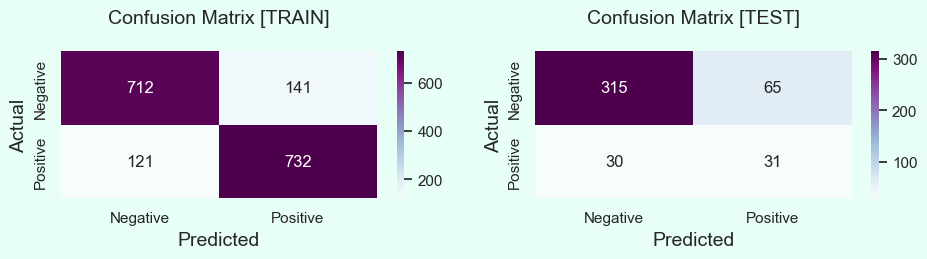

In [71]:
plt.figure(figsize=(10,4))

# Plot Confusion Matrix using Seaborn heatmap()
ax = plt.subplot(2, 2, 1)
ax = sns.heatmap(conf_matrix_train, annot=True, fmt='d',cmap="BuPu")
# set x-axis label and ticks. 
ax.set_xlabel("Predicted", fontsize=14)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
# set y-axis label and ticks
ax.set_ylabel("Actual", fontsize=14)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
# set plot title
ax.set_title(f"Confusion Matrix [TRAIN]", fontsize=14, pad=20)


# Plot Confusion Matrix using Seaborn heatmap()
ax = plt.subplot(2, 2, 2)
ax = sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap="BuPu")
# set x-axis label and ticks. 
ax.set_xlabel("Predicted", fontsize=14)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
# set y-axis label and ticks
ax.set_ylabel("Actual", fontsize=14)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
# set plot title
ax.set_title(f"Confusion Matrix [TEST]", fontsize=14, pad=20)

plt.show()

The confusion matrix helps visualize the accuracy score by showing the true positive, true negative, false positive, and false negative

- True Negative (Top-Left Quadrant)
- False Positive (Top-Right Quadrant)
- False Negative (Bottom-Left Quadrant)
- True Positive (Bottom-Right Quadrant)

**Interpretation**

TRAIN DATA
- There are 712 True Negative and 121 False Negative
- There 732 True Positive and 141 False Positive

TEST DATA
- There are 315 True Negative and and 30 False Negatives
- There are 31 True Positive and 65 False Positive

**Data Source:**
- https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

**References:**
- https://www.kaggle.com/code/prashant111/logistic-regression-classifier-tutorial
- https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
- https://towardsdatascience.com/weighted-logistic-regression-for-imbalanced-dataset-9a5cd88e68b#
- https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
- https://machinelearningmastery.com/rfe-feature-selection-in-python/
- https://www.geeksforgeeks.org/logistic-regression-using-statsmodels/
- https://www.statology.org/sklearn-classification-report/


**Installations**
- Python 3.10.0
- seaborn 
    v0.12.2
- plotly
    v5.13.0
- lxml
    v4.8.0
- imblearn
    v0.0
- nbformat 
    v5.7.3

<!-- # https://towardsdatascience.com/seaborn-pairplot-enhance-your-data-understanding-with-a-single-plot-bf2f44524b22#:~:text=The%20Seaborn%20Pairplot%20allows%20us,to%20become%20familiar%20with%20it.

sns.pairplot(model_data.drop(columns=['Serial_No.', 'outlier_tag']), diag_kind='kde',diag_kws={'color':'red'}, kind='reg',plot_kws={'line_kws':{'color':'black'},'color':'green'},hue='Research',)
plt.show() -->